In [ ]:
from google.colab import files
upload = files.upload()

Saving insurance.csv to insurance (1).csv


In [ ]:
# !pip install scikit-learn


In [ ]:
import sklearn
print(sklearn.__version__)


1.3.0


In [ ]:
!pip install scikit-learn==1.3.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
df = pd.read_csv("insurance.csv")

### Data Analysis

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
#check duplicate
df=df.drop_duplicates()

In [ ]:
df.shape

(1337, 7)

<ipython-input-15-29306f227fc7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], ax=axes[0], kde = False)
<ipython-input-15-29306f227fc7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], ax=axes[0], kde = False)
<ipython-input-15-29306f227fc7>:4: UserWarning: 

`distplot` is a depr

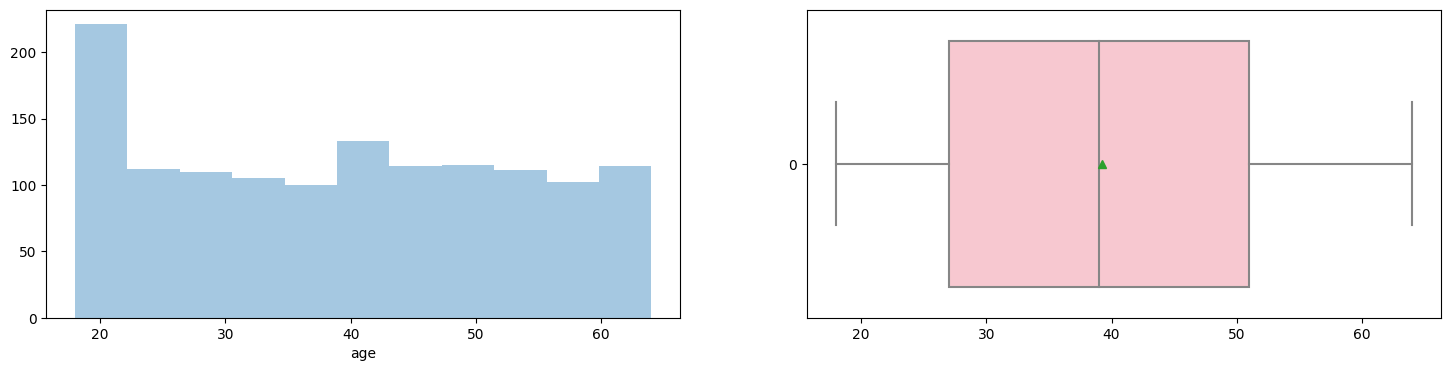

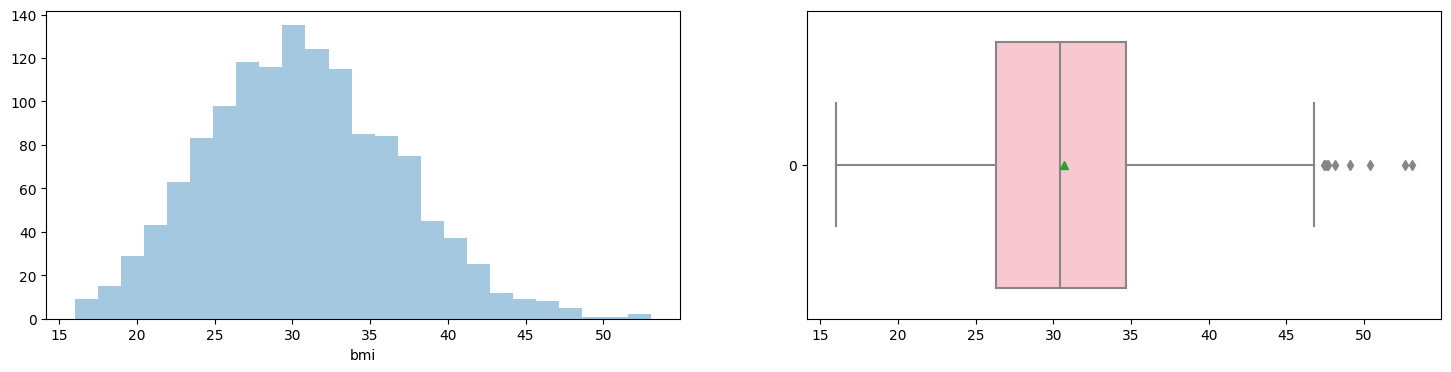

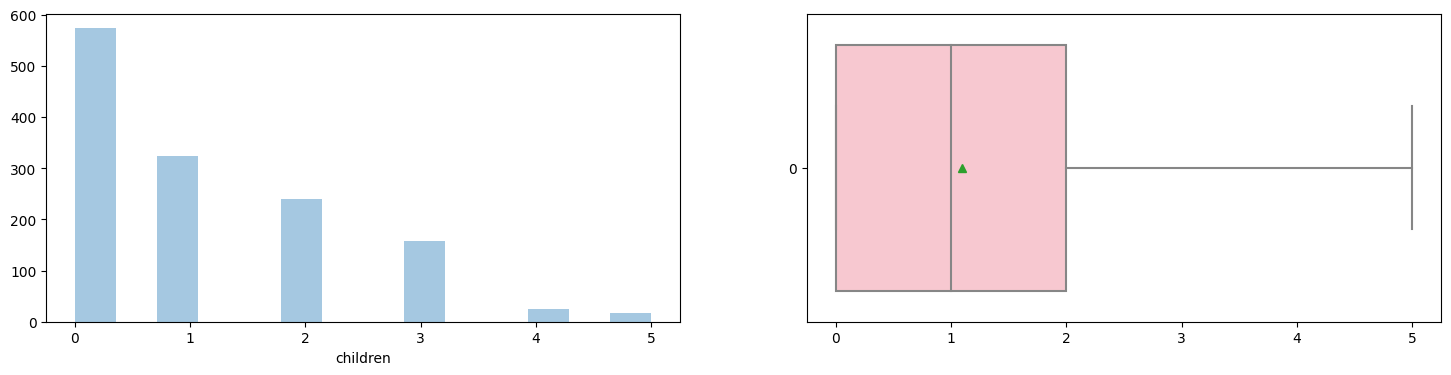

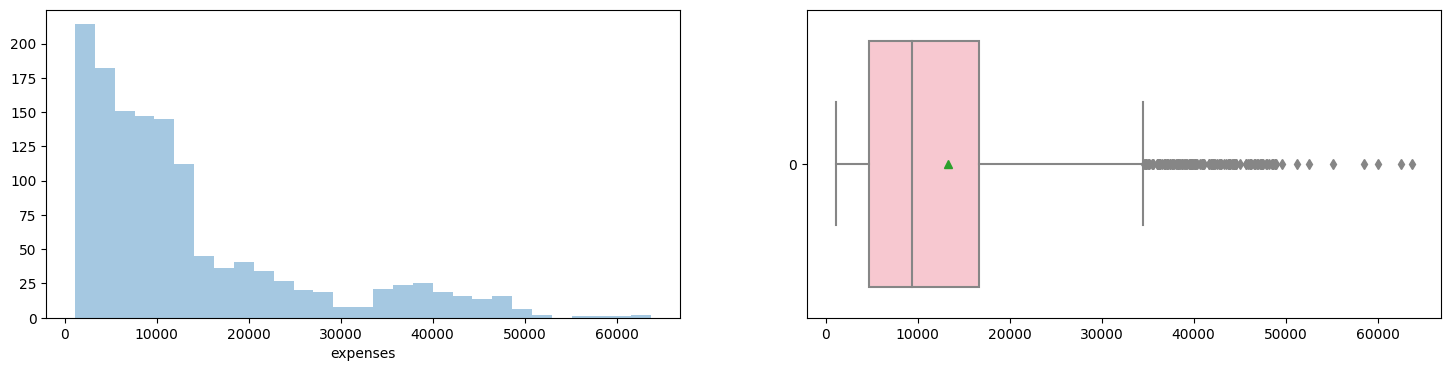

In [ ]:
x_axis = ['age','bmi','children','expenses']
for x in x_axis:
  fig,axes = plt.subplots(1,2,figsize=(18,4))
  sns.distplot(df[x], ax=axes[0], kde = False)
  sns.boxplot(df[x],ax=axes[1],orient="h", showmeans=True,color="pink")

### Handle Categorical Columns

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['sex']=df.sex.map({'female':0,'male':1})

In [ ]:
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55


In [ ]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['smoker']=df.smoker.map({'yes':1,'no':0})

In [ ]:
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55


In [ ]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['region']=df.region.map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 115.9 KB


### Split the Dataset

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
x =df.drop(['expenses'],axis=1)

In [ ]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,3
4,32,1,28.9,0,0,3


In [ ]:
y = df[['expenses']]

In [ ]:
y.head()

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


In [ ]:
#Train_Test split
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(1069, 6)

In [ ]:
x_test.shape

(268, 6)

### Model training

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
score1 = r2_score(y_test,y_pred)

In [ ]:
score1   ##Linear Regression Accuracy

0.8068280291899953

In [ ]:
## SVM
from sklearn.svm import SVR

In [ ]:
svm = SVR()

In [ ]:
svm.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred=svm.predict(x_test)
score2=r2_score(y_test,y_pred)
score2

-0.1344469486786597

In [ ]:
## Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
score3=r2_score(y_test,y_pred)
score3 ## Random Forest Accuracy

0.882147043852989

### Final model is Random Forest Regressor

In [ ]:
premium_rf=rf.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
import joblib

In [ ]:
joblib_file = "InsurancePremiumPrediction.joblib"

In [ ]:
joblib.dump(premium_rf,joblib_file)

['InsurancePremiumPrediction.joblib']

In [ ]:
insurance_model = joblib.load('InsurancePremiumPrediction.joblib')

In [ ]:
## predict charges in new customer
data = {
    'age':40,
    'sex':1,
    'bmi':40,
    'children':3,
    'smoker':1,
    'region':2
}

new_df = pd.DataFrame(data,index=[0])
new_df

,age,sex,bmi,children,smoker,region
0,40,1,40,3,1,2


In [ ]:
print(insurance_model.predict(new_df))

[42392.3244]


In [ ]:
data2 = {
    'age':19,
    'sex':0,
    'bmi':27.9,
    'children':0,
    'smoker':1,
    'region':1
}

new_df2 = pd.DataFrame(data2,index=[0])
print(insurance_model.predict(new_df2))

[17117.3523]
